<a href="https://colab.research.google.com/github/Deadpoets888/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import torch
from torch import nn
import matplotlib.pyplot as plt # nn contains all Pytorch's building blocks for neural networks

In [97]:
#cerate known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1) #We use X to represent matrix and y to represent vector
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [98]:
len(X), len(y)

(50, 50)

#Splitting data into training and test sets

Note: one of the most important concepts in ML

Generalization - ability of a ML model to perform well on data it hasn't seen before

In [99]:
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

Visualize the data!!!

In [100]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label = "Training Data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=5, label="Testing Data")

  #Are there prediictions?
  if predictions is not None: #plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

  #show the legend
  plt.legend(prop={"size": 12})



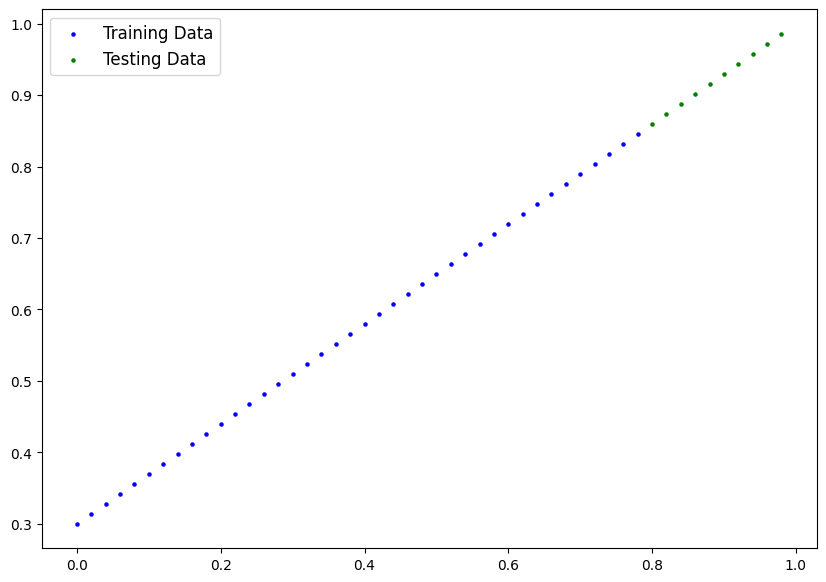

In [101]:
plot_predictions()

#Build Model

What the below model do:

-> It starts with random values(weight $ bias)

-> Look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight & and the bias values)

How does it do?

Through two main Algorithms

1.Gradient descent

2.backpropagation

In [102]:
from torch import nn

#Create linear regression model class
class LinearRegressionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
    #requires_grad -> keep track of gradient of different parameters

  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights* x + self.bias #this is linear regression formula



In [103]:
#So, Module is part of torch.nn and is used as a base class for defining custom models in PyTorch.
# A subclass of nn.Module is any class that inherits from torch.nn.Module and extends its functionality. This is how we create custom neural network architectures in PyTorch.
#every subclass of nn.Module must override the forward method because PyTorch uses it to define how inputs flow through the network.

#Pytorch model building essentials

* torch.nn - contains all of the building for computational graphs(a NN can be considered computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

#Checking the contents of our Pytorch model

Now we've created a model,let's see what's inside.......
So we can check our  model parameters or wat's inside our model using .parameters()

Note:

torch.randn(6) #-> generates 6 random values

torch.manual_seed(2051) #-> it makes randn to print same values every time

torch.randn(6)

In [104]:
#create a model seed
torch.manual_seed(50)

#create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionmodel()

#check out the parameters
#model_0.parameters() -> it generaters address
list(model_0.parameters())

[Parameter containing:
 tensor([0.4625], requires_grad=True),
 Parameter containing:
 tensor([-0.1692], requires_grad=True)]

In [105]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.4625])), ('bias', tensor([-0.1692]))])

In [106]:
weight, bias #these are ideal values and we need to move the above random value to ideal values as close as possible(through gradient descent and backpropagation)
#And in most cases you will not know what ideal values are

#the premise of deep learning is to start with random values and make them more representative closer to ideal values

(0.7, 0.3)

#Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

Note: what an ideal model do here is that it will take `X_test` as input and return `y_test` as output exactly

In [107]:
y_prediction = model_0(X_test)

y_prediction

tensor([[0.2008],
        [0.2100],
        [0.2193],
        [0.2285],
        [0.2378],
        [0.2470],
        [0.2563],
        [0.2655],
        [0.2748],
        [0.2840]], grad_fn=<AddBackward0>)

In [108]:
#Let's make predictions with model
with torch.inference_mode(): # it turns of gradient tracking
  y_prediction = model_0(X_test)

#you can do something similar with torch.no_grad(), however, torch.inference_mode id prefered
# with torch.no_grad():
  # y_prediction = model_0(X_test)

y_prediction

#here pytorch behind the scene is keepinf  track of less data it means with larger dataset predictions will be lot faster

tensor([[0.2008],
        [0.2100],
        [0.2193],
        [0.2285],
        [0.2378],
        [0.2470],
        [0.2563],
        [0.2655],
        [0.2748],
        [0.2840]])

In [109]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

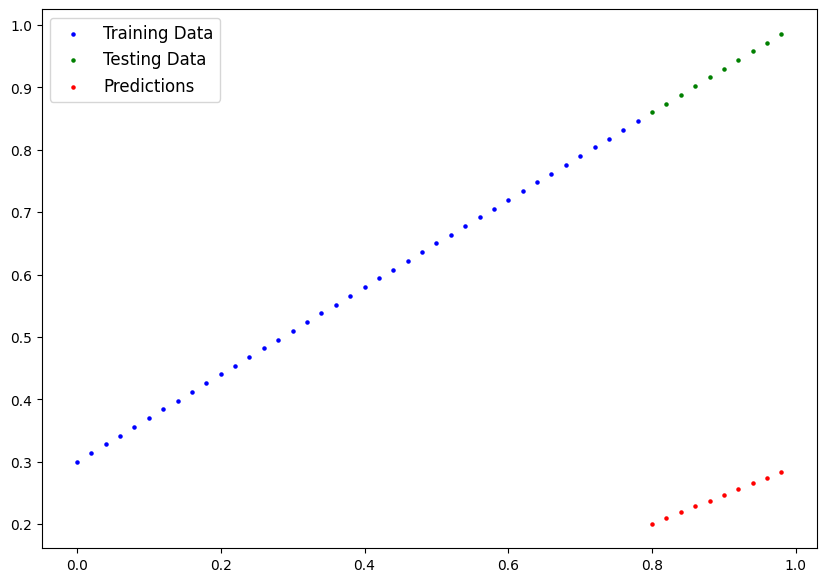

In [110]:
plot_predictions(predictions = y_prediction)

#Train model

THe whole idea of training us for a model to move from some unknown parameters(these may be random) to some known nn.parameter

Or in other words from a poor represention of the data to a better representation of the data

One way to measure how poor or wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function** - A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer** - Takes into account the loss of a model and adjusts the model's parameters(eg., weight and bias in our case) to improve the loss function.

  * Inside the optimizer you'll often have to set two parameters

    * `params` - the model parameters you'd like to optimize, for example parama = model_0.parameters()

    * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with with each step(a small lr result in small changes and vice versa)

And specifically for Pytorch, we need:

*Training Loop

*Testing Loop

In [111]:
#set up a loss fucntion
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01) #learning rate possibly is the most important hyperparameter you can set

#the more the learning rate the more the change in the parameter and vice versa

In [112]:
# Hyperparameter - we set it
#parameter - model set itself

#Building a training loop(and a testing loop) in Pytorch

A couple of things we need in a training loop

0. Loop through the data
1. Forward pass(this involves data moving through our model's `forward()` functions) to make predictions on data -  also called forward propagation
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4.Loss backward - move backwards through the network to calculate the gradients of each parameters of our model with respect to the loss (**backpropagation**)
5. optimiazer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)

In [134]:
#An epoch is one loop through the data...(this is a hyperparameter because we'se it ourself)
epochs = 20
###training
#0. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode(this is default state of a model())
  model_0.train() #train mode in pytorch sets all parameters that require gradients to require gradients

  #1. Forward pass
  y_prediction = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_prediction, y_train)
  print("Loss", loss)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optmizer(perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
  #it uses the gradient(computed by loss.backword()) to update parameters and update rule depends on optimizer

  #model_0.eval() #turn off gradient tracking

Loss tensor(0.4236, grad_fn=<MeanBackward0>)
Loss tensor(0.4121, grad_fn=<MeanBackward0>)
Loss tensor(0.4006, grad_fn=<MeanBackward0>)
Loss tensor(0.3890, grad_fn=<MeanBackward0>)
Loss tensor(0.3775, grad_fn=<MeanBackward0>)
Loss tensor(0.3660, grad_fn=<MeanBackward0>)
Loss tensor(0.3545, grad_fn=<MeanBackward0>)
Loss tensor(0.3429, grad_fn=<MeanBackward0>)
Loss tensor(0.3314, grad_fn=<MeanBackward0>)
Loss tensor(0.3199, grad_fn=<MeanBackward0>)
Loss tensor(0.3084, grad_fn=<MeanBackward0>)
Loss tensor(0.2969, grad_fn=<MeanBackward0>)
Loss tensor(0.2853, grad_fn=<MeanBackward0>)
Loss tensor(0.2738, grad_fn=<MeanBackward0>)
Loss tensor(0.2623, grad_fn=<MeanBackward0>)
Loss tensor(0.2508, grad_fn=<MeanBackward0>)
Loss tensor(0.2393, grad_fn=<MeanBackward0>)
Loss tensor(0.2277, grad_fn=<MeanBackward0>)
Loss tensor(0.2162, grad_fn=<MeanBackward0>)
Loss tensor(0.2047, grad_fn=<MeanBackward0>)


In [114]:
#Value of loss have been going down

In [126]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4898])), ('bias', tensor([-0.0992]))])

In [116]:
#Learning rate scheduling
#point of convergence - where loss function's value is minimumc

In [139]:
#plot_predictions(predictions = y_prediction) When I'm trying to run this code here, it is  giving me error

In [137]:
with torch.inference_mode():
  y_prediction_new =model_0(X_test)

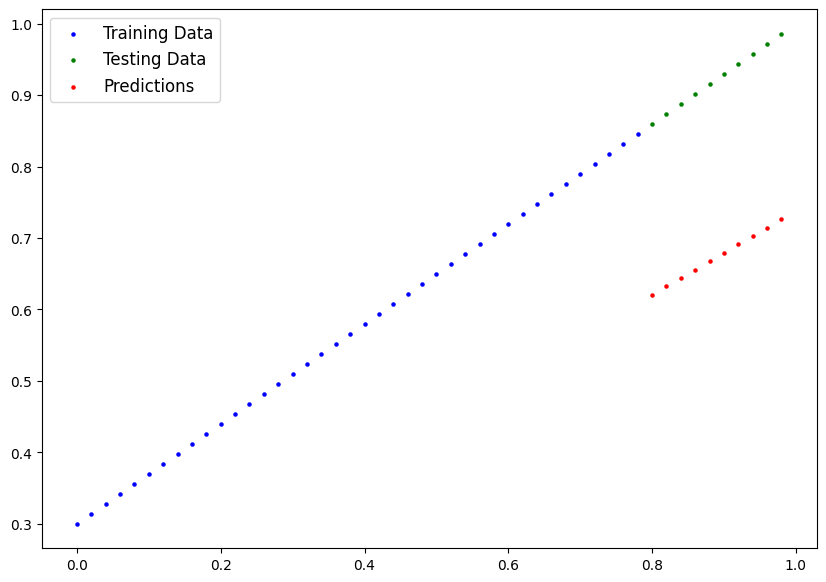

In [138]:
plot_predictions(predictions=y_prediction_new);